In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt 
from pyquil.api import WavefunctionSimulator
from grove.pyqaoa.maxcut_qaoa import maxcut_qaoa
from pyquil.api import get_qc

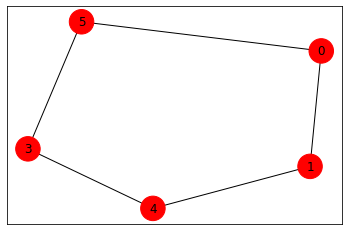

In [15]:
# Generating a graph using NetworkX
E = [(0,1,0.7),(0,5,0.3),(1,4,0.9),(4,3,1.1), (3,5,0.5)] 
weighted_graph = nx.Graph()
weighted_graph.add_weighted_edges_from(E1)

# Generate plot of the Graph
colors       = ['r' for node in weighted_graph.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(weighted_graph)

nx.draw_networkx(weighted_graph, node_color=colors, node_size=600, alpha=1, ax=default_axes, pos=pos)

In [25]:
steps = 2
inst = maxcut_qaoa(weighted_graph, steps=steps, connection=get_qc(f"{len(weighted_graph.nodes)}q-qvm", noisy=True)) # Noisy Case
opt_betas, opt_gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [1.05060895 0.83987549 6.51985908 1.99221805] 
	E => 5.7018088971647565
	Parameters: [1.05060895 0.83987549 6.51985908 1.99221805] 
	E => 5.668005342777334
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.537454202336127
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.6086505893647995
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.608603602802755
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.56337257621251
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.541758258156356
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.532338734725281
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.555760907618303
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.514397644550266
	Parameters: [1.1097057  0.80838016 6.55866777 1.97976668] 
	E => 5.52564139114053
	Parameters: [1.15471166 0.8

In [17]:
t = np.hstack((opt_betas, opt_gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = WavefunctionSimulator().wavefunction(prog)
wf = wf.amplitudes

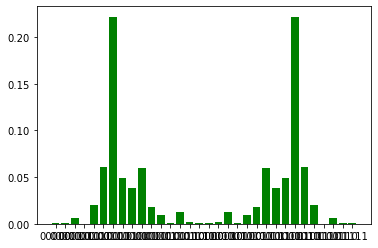

Optimal State: 00110


In [18]:
states = []
probs = []
for state_index in range(inst.nstates):
    #print(inst.states[state_index], np.conj(wf[state_index]) * wf[state_index])
    probs.append(np.conj(wf[state_index]) * wf[state_index])
    states.append(inst.states[state_index])
plt.bar(states, probs, color="green")
plt.show()
print("Optimal State:",inst.states[np.argmax(probs)])

# Observations

In our first circuit we can see the two peaks with the steps/circuit depth = 2, from which we can imply that if we increase the number of steps/circuit depth than we can see much clearer results.  

## Noiseless case

In [21]:
steps = 2 # steps or circuit depth.
inst = maxcut_qaoa(weighted_graph, steps=steps, connection=get_qc(f"{len(weighted_graph.nodes)}q-qvm", noisy=False)) #Noiseless
opt_betas, opt_gammas = inst.get_angles()

                     models will be ineffective
	Parameters: [0.64789409 0.46066392 1.13630103 3.66160821] 
	E => 5.891934563698188
	Parameters: [0.64789409 0.46066392 1.13630103 3.66160821] 
	E => 5.993949594595674
	Parameters: [0.64789409 0.46066392 1.13630103 3.66160821] 
	E => 5.93990867923848
	Parameters: [0.64789409 0.46066392 1.13630103 3.66160821] 
	E => 5.8976034909918456
	Parameters: [0.64789409 0.46066392 1.13630103 3.66160821] 
	E => 5.949338251894208
	Parameters: [0.64789409 0.46066392 1.13630103 3.66160821] 
	E => 5.907751661049115
	Parameters: [0.64789409 0.46066392 1.13630103 3.66160821] 
	E => 5.895650144208034
	Parameters: [0.66857911 0.46908402 1.1128175  3.64472253] 
	E => 5.890949395149267
	Parameters: [0.67546411 0.46799018 1.13688846 3.47256318] 
	E => 5.874851619004666
	Parameters: [0.62469456 0.49450634 1.17363642 3.47895118] 
	E => 5.836269294097473
	Parameters: [0.62469456 0.49450634 1.17363642 3.47895118] 
	E => 5.867397664238781
	Parameters: [0.62469456 0.4

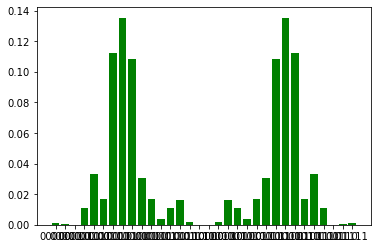

Optimal State: 00111


In [24]:
t = np.hstack((opt_betas, opt_gammas))
param_prog = inst.get_parameterized_program()
prog = param_prog(t)
wf = WavefunctionSimulator().wavefunction(prog)
wf = wf.amplitudes
states = []
probs = []
for state_index in range(inst.nstates):
    states.append(inst.states[state_index])
    probs.append(np.conj(wf[state_index]) * wf[state_index])
#probs = wf.probabilities()
plt.bar(states,probs, color="green")
plt.show()

In the noiseless case we can see a E<sub>noisless</sub> = 4.722315132554394 from 5.074398804130744